In [1]:
import os,sys,re
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic' # 차트에서 한글 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False  # 차트에서 -기호 깨짐 방지
os.getcwd() # usecsv import하기 위해 현재 작업경로 확인

sys.path.append('c:\\Users\\LG\\Desktop\\Python_practice\\test') # 현제 작업경로를 변경해도 해당 작업폴더 안에 있는 파일 import가능
import usecsv
os.chdir('c:/test/apt') # apt파일 불러오기 위해 해당 폴더로 이동

files = os.listdir() # 폴더 안 파일들 확인
files
 

['apt_202301.csv',
 'apt_202302.csv',
 'apt_202303.csv',
 'apt_202304.csv',
 'apt_202305.csv',
 'apt_202306.csv',
 'over_jeonju_apt.csv']

In [2]:
apt_files = [filename for filename in files if re.match('apt_\d{6}.csv',filename)]

apt_files

['apt_202301.csv',
 'apt_202302.csv',
 'apt_202303.csv',
 'apt_202304.csv',
 'apt_202305.csv',
 'apt_202306.csv']

In [3]:
apt_df = pd.DataFrame()

for apt_file in apt_files:
    month_apt_file = pd.read_csv(apt_file,encoding='cp949',thousands=',',skiprows=[i for i in range(15)])
    apt_df = pd.concat([apt_df,month_apt_file]) # df 파일 합칠 때는 [,] 대괄호를 해주어야 함!!!
    
apt_df.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,강원도 강릉시 견소동,202,0202,0.0,송정한신,84.93,202301,4,25000,6,1997.0,경강로2539번길 8,NaN,중개거래,강원 강릉시
1,강원도 강릉시 견소동,289,0289,0.0,송정해변신도브래뉴아파트,84.99,202301,5,29800,8,2005.0,경강로2539번길 22,NaN,중개거래,강원 강릉시
2,강원도 강릉시 견소동,289,0289,0.0,송정해변신도브래뉴아파트,84.99,202301,25,28500,5,2005.0,경강로2539번길 22,NaN,중개거래,강원 강릉시
3,강원도 강릉시 교동,1766,1766,0.0,교동3주공,59.86,202301,4,20000,11,2002.0,교동광장로 138-12,20230227.0,직거래,-
4,강원도 강릉시 교동,1766,1766,0.0,교동3주공,59.84,202301,11,25000,3,2002.0,교동광장로 138-12,NaN,중개거래,강원 강릉시


In [4]:
# 전주 지역에서 면적 80이상, 거래금액 50000이상인 자료의 
#['지역', '아파트명', '면적', '거래금액','계약년월일'] 나타내기


apt_df.columns = ['지역', '번지', '본번', '부번', '아파트명', '면적', '계약년월', '계약일', '거래금액',
       '층', '건축년도', '도로명', '해제사유발생일', '거래유형', '중개사소재지']

jeonju_apt_df = apt_df[(apt_df['지역'].str.contains('전주'))&(apt_df['거래금액']>50000) & (apt_df['면적']>84)]


year_month = jeonju_apt_df['계약년월'] * 100 + jeonju_apt_df['계약일']

jeonju_apt_df['계약년월일'] = year_month

c:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [5]:
jeonju_apt_df = jeonju_apt_df[['지역', '아파트명', '면적', '거래금액','계약년월일']]

jeonju_apt_df.head()

,지역,아파트명,면적,거래금액,계약년월일
17338,전라북도 전주덕진구 만성동,중흥에스클래스더퍼스트,104.3320,55000,20230111
17339,전라북도 전주덕진구 만성동,중흥에스클래스더퍼스트,104.3320,53000,20230120
17340,전라북도 전주덕진구 만성동,중흥에스클래스더퍼스트,104.3320,58000,20230127
17401,전라북도 전주덕진구 송천동2가,에코시티더샵3차,84.9800,52500,20230125
17405,전라북도 전주덕진구 송천동2가,에코시티데시앙14블럭,125.6605,83000,20230128


In [6]:
# 해당 파일 .csv파일로 내보내기

# jeonju_apt_df.to_csv('over_jeonju_apt.csv')

In [7]:
# local 지역에서 면적 area 이상, 거래금액 amount 이상인 자료의 
#['지역', '아파트명', '면적', '거래금액','계약년월','계약일'] 나타내기

# local,area,amount = input('해당 지역과 면적, 거래금액을 입력하세요. ').split() # 이렇게 하면 area,amount가 문자열로 인식되어 안됨

def find_apt(local,area,amount):
    apt_df_a = apt_df[(apt_df['지역'].str.contains(local)) & (apt_df['거래금액'] >= amount)\
    & (apt_df['면적']>=area)]

    apt_df_a = apt_df_a[['지역', '아파트명', '면적', '거래금액','계약년월','계약일']]
    
    return apt_df_a

local = input('지역을 입력하세요. ');area = int(input('면적을 입력하세요. '));amount = int(input('금액을 입력하세요. '))

apt_df_a = find_apt(local,area,amount)
apt_df_a.head()


,지역,아파트명,면적,거래금액,계약년월,계약일
15,강원도 강릉시 송정동,경포대신도브래뉴로얄카운티,155.4160,70000,202301,10
19,강원도 강릉시 유천동,강릉유천유승한내들더퍼스트,96.3359,60000,202301,18
570,강원도 춘천시 온의동,온의롯데캐슬스카이클래스,125.7090,80000,202301,2
571,강원도 춘천시 온의동,온의롯데캐슬스카이클래스,99.6290,55000,202301,6
572,강원도 춘천시 온의동,온의롯데캐슬스카이클래스,99.6290,50000,202301,6


<BarContainer object of 6 artists>

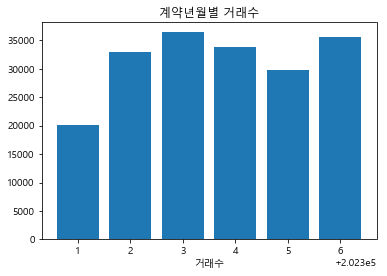

In [8]:
# apt_total_result 로 차트 그리기
# 계약년월별 거래 수를 구하고, 참고로 type도 확인해 본다.

year_month_sr = apt_df['계약년월']

plt_sr = year_month_sr.value_counts()
plt_sr.sort_index(inplace=True)

plt.xlabel('계약년월')
plt.xlabel('거래수')
plt.title('계약년월별 거래수')
plt.bar(plt_sr.index,plt_sr.values)

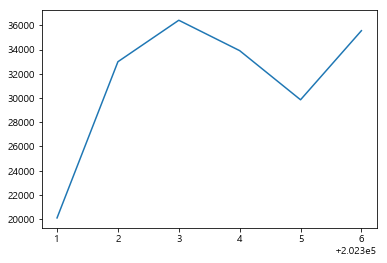

In [9]:
plt.plot(plt_sr.index,plt_sr.values)

In [19]:
# 지역별 월별의 거래건수와 최대 거래금액 
apt_df['월'] = apt_df['계약년월'] % 100
local = input('지역을 ,로 구분하여 입력하세요').split(',')
local_join = '|'.join(local) # '전주|군산|익산' 처럼 됩니다.

new_apt_df = apt_df[apt_df['지역'].str.contains(local_join) & (apt_df['면적']>100)]


new_apt_df.head()



,지역,번지,본번,부번,아파트명,면적,계약년월,계약일,거래금액,층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,월
16936,전라북도 군산시 구암동,65,0065,0.0,현대,125.8950,202301,30,18900,15,1994.0,서당길 11,NaN,중개거래,전북 군산시,1
16978,전라북도 군산시 미룡동,71,0071,0.0,금광베네스타,139.7600,202301,11,30800,20,2008.0,용둔길 12,NaN,중개거래,전북 군산시,1
16981,전라북도 군산시 미룡동,59-59,0059,59.0,은파리젠시빌파크,132.4163,202301,25,25700,9,2007.0,미룡로 64,NaN,중개거래,전북 군산시,1
16986,전라북도 군산시 미장동,484,0484,0.0,군산미장2차아이파크,101.7892,202301,13,41200,14,2017.0,미장안길 45,NaN,중개거래,전북 군산시,1
16990,전라북도 군산시 미장동,473,0473,0.0,군산수송공원삼성쉐르빌,104.1610,202301,10,30900,13,2009.0,경포천로 66,NaN,직거래,-,1


In [24]:
for i in local: # new_df의 '시군구' 칼럼에 입력한 주소가 있으면 '지역' 칼럼에 주소를 대입한다.
    new_apt_df.loc[new_apt_df['지역'].str.contains(i),'지역2']=i
	
new_apt_df

g_new_df=new_apt_df.groupby(['지역2','월'])['거래금액'].agg(['count','max','min'])

g_new_df.reset_index()

,지역2,월,count,max,min
0,군산,1,12,49300,17500
1,군산,2,18,50000,10000
2,군산,3,15,51600,14750
3,군산,4,18,48000,6200
4,군산,5,12,63000,15000
5,군산,6,28,54500,6950
6,익산,1,8,59500,19000
7,익산,2,7,42000,26000
8,익산,3,5,50800,13000
9,익산,4,3,35000,32750
